In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import models and functions for classification tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

In [2]:
student_data = pd.read_csv('dataset.csv')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print("Data type : ", type(student_data))
print("Data dims : ", student_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4424, 35)


# Multi-variate classification tree

- Response variable: Target
- Predictor feature: Curricular units 2nd sem (grade), Curricular units 2nd sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (approved)

In [4]:
# One-hot encode the categorical features
cats = ["Marital status", "Application mode", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Gender", "Target"]
df_ohe = pd.get_dummies(student_data, columns=cats)
df_ohe

,Application order,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Father's occupation_46,Gender_0,Gender_1,Target_Dropout,Target_Enrolled,Target_Graduate
0,5,1,0,0,1,0,20,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,0,0,1
2,5,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,1,0,0
3,2,1,0,0,1,0,20,0,0,6,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,45,0,0,6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,0,0,0,1,0,19,0,0,6,...,0,0,0,0,0,0,1,0,0,1
4420,2,1,0,1,0,0,18,1,0,6,...,0,0,0,0,0,1,0,1,0,0
4421,1,1,0,0,1,1,30,0,0,7,...,0,0,0,0,0,1,0,1,0,0
4422,1,1,0,0,1,1,20,0,0,5,...,0,0,0,0,0,1,0,0,0,1


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8224834237492465

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8282097649186256



<AxesSubplot:>

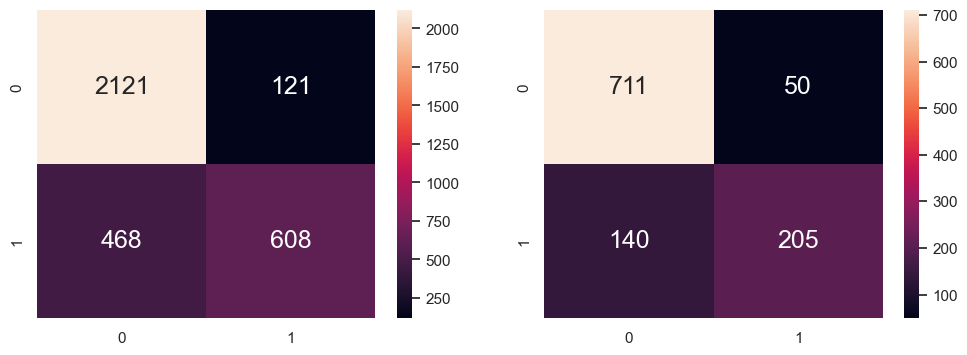

In [5]:
# Extract Response and Predictors
y = pd.DataFrame(df_ohe['Target_Dropout'])
X = pd.DataFrame(df_ohe[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (approved)"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.8333333333333334, 'Curricular units 2nd sem (approved) <= 3.5\ngini = 0.438\nsamples = 3318\nvalue = [2242, 1076]\nclass = Dropout'),
 Text(0.25, 0.5, 'Curricular units 2nd sem (approved) <= 1.5\ngini = 0.405\nsamples = 1116\nvalue = [315, 801]\nclass = Enrolled'),
 Text(0.125, 0.16666666666666666, 'gini = 0.277\nsamples = 729\nvalue = [121, 608]\nclass = Enrolled'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 387\nvalue = [194, 193]\nclass = Dropout'),
 Text(0.75, 0.5, 'Curricular units 2nd sem (approved) <= 4.5\ngini = 0.219\nsamples = 2202\nvalue = [1927, 275]\nclass = Dropout'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 308\nvalue = [220, 88]\nclass = Dropout'),
 Text(0.875, 0.16666666666666666, 'gini = 0.178\nsamples = 1894\nvalue = [1707, 187]\nclass = Dropout')]

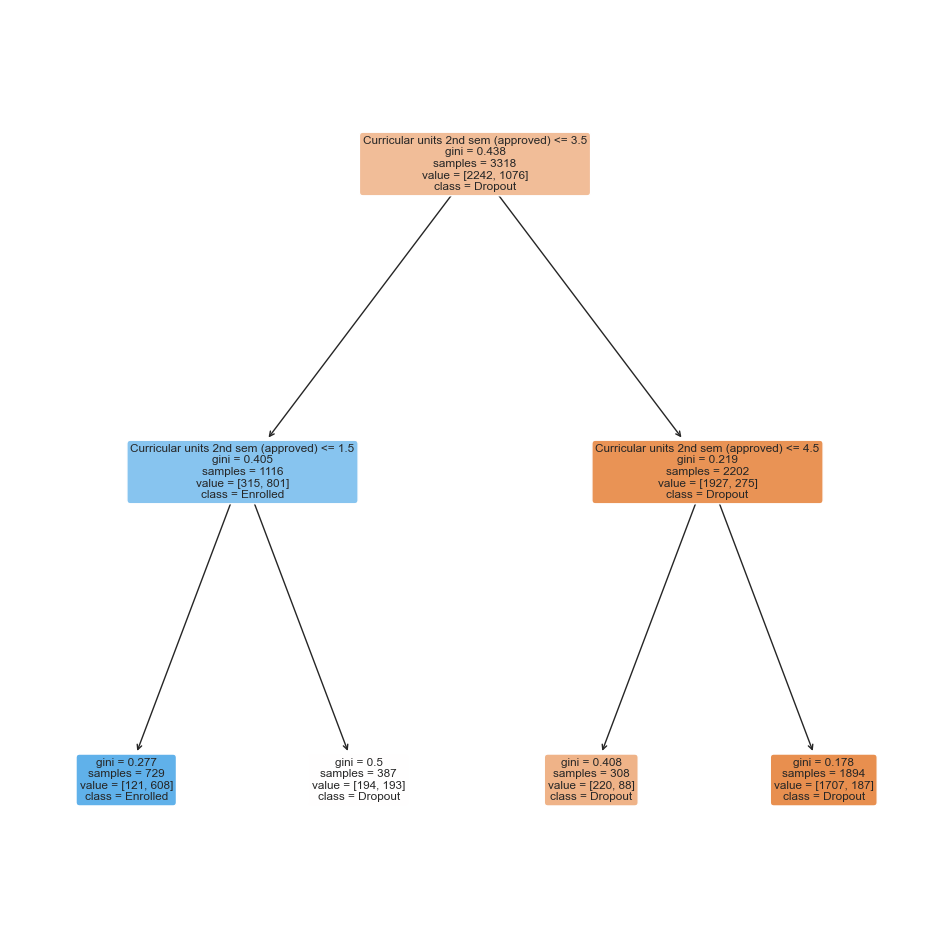

In [6]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Dropout","Enrolled","Graduate"])

The goodness of fit and classification accuracies of both the train and test set are mucher higher, around 0.8, academic grades seem to be able to predict dropout rates with more reliability.

# Random Forest classifier

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(df_ohe['Target_Dropout'])
X = pd.DataFrame(df_ohe[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (approved)"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Target_Dropout.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8381555153707052

TPR Train :	 0.654275092936803
TNR Train :	 0.9264049955396967

FPR Train :	 0.0735950044603033
FNR Train :	 0.34572490706319703


<AxesSubplot:>

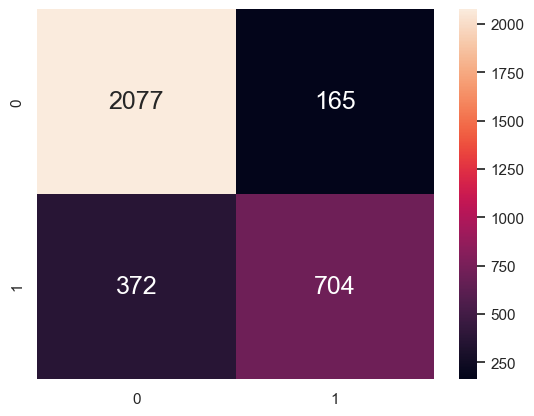

In [9]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8273056057866185

TPR Test :	 0.6115942028985507
TNR Test :	 0.9250985545335085

FPR Test :	 0.07490144546649145
FNR Test :	 0.3884057971014493


<AxesSubplot:>

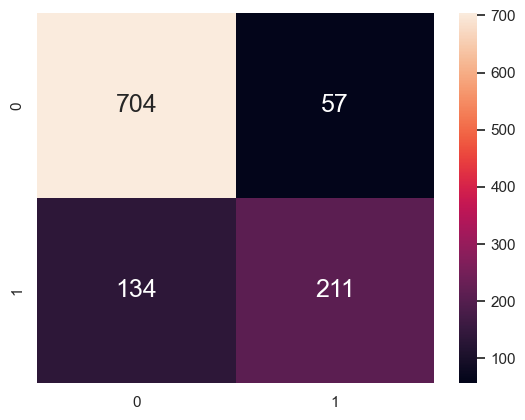

In [10]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

There does not seem to be a significant difference in the accuracy of the random forest classifier as compared to the decision tree classifier.